Sequence Visualization

In [1]:
%load_ext autoreload
%autoreload 2
import utils as U
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from utils import create_train_transforms
from datasets.dfdc_dataset import DeepFakeTrainingDataset

In [29]:
dataset = DeepFakeTrainingDataset(crops_dir='crops', data_path='../datasets/dfdc', hardcore=True, normalize=None, folds_csv='../datasets/dfdc/folds.csv', 
                                  transforms=create_train_transforms( 220, option='cutout_da',))
dataset.reset(2,1)

real 585977 fakes 585977 mode train


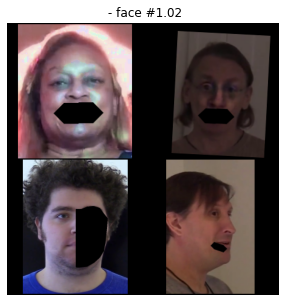

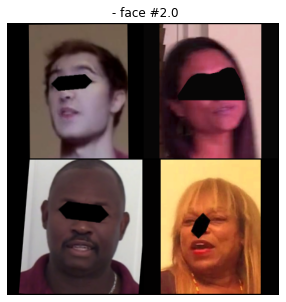

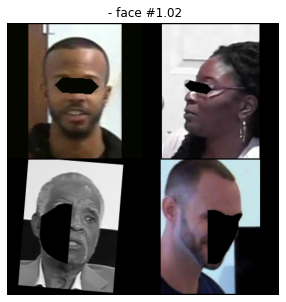

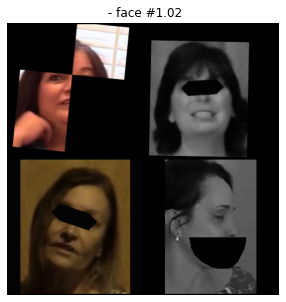

In [32]:
sampler = None
loader = DataLoader(dataset, batch_size=4, num_workers=1, shuffle=sampler is None, sampler=sampler, pin_memory=False, drop_last=True)
for i, (data) in enumerate(loader):
    grid = torchvision.utils.make_grid(data["image"], nrow=2)
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    ax.imshow(np.transpose(grid.numpy(), (1,2,0)))
    ax.set_title(f' - face #{data["labels"].sum()}')
    ax.axis('off')
    plt.show()
    #print(data)
    if i > 2:
        break

## TUM Dataset

In [1]:
%load_ext autoreload
%autoreload 2
from datasets.ff_dataset import get_loader, read_dataset, CompositeDataset
from utils import read_training_dataset, create_train_transforms
from torch.utils.data import DataLoader
import torch
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [20]:
filter_ = lambda x: ('original' in x or 'neural' in x)
train, val, _ =  read_training_dataset('../datasets/mtcnn', filter=filter_ ,
                                        transform = create_train_transforms(224, option='no_da', dataset='faceforensics'), max_videos = 10, max_images_per_video=5, normalization=None)

Using training data: 
neural_textures_faces_c23
neural_textures_faces_c40
neural_textures_faces_raw
original_faces_c23
original_faces_c40
original_faces_raw


In [49]:
sampler = torch.utils.data.distributed.DistributedSampler(train, num_replicas=1, rank=0, shuffle=True)

neural_textures_faces_raw 762_832 0001
original_faces_c23 299 0002
neural_textures_faces_c23 465_482 0000
original_faces_c23 299 0001
neural_textures_faces_raw 
465_482 0004neural_textures_faces_raw 762_832 0002
original_faces_raw 566 0003


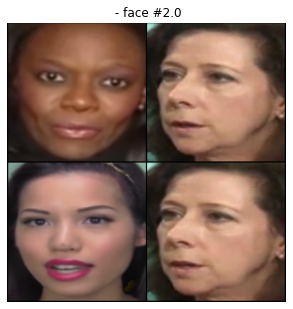

neural_textures_faces_raw 273_807 0004
neural_textures_faces_c23 912_927 0004
original_faces_c23 084 0002
original_faces_raw

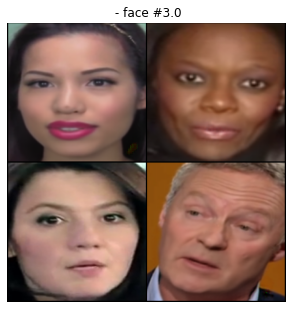

 666 0002
neural_textures_faces_c40 900_926 0003
original_faces_raw 492 0001
original_faces_c40 762 0000


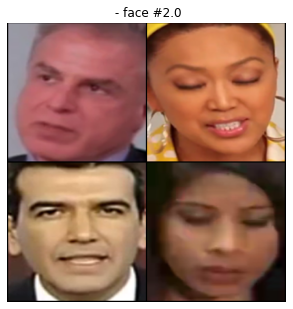

neural_textures_faces_c23 900_926 0000
neural_textures_faces_raw 584_823 0002
neural_textures_faces_c23 350_349 0000
neural_textures_faces_c23 084_042 0004


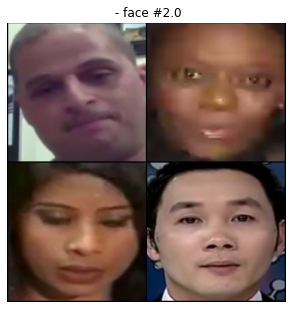

original_faces_c40 852 0002
neural_textures_faces_raw 857_909 0000


In [52]:
sampler.set_epoch(101)
loader = DataLoader(val, batch_size=4, num_workers=1, shuffle=sampler is None, sampler=sampler, pin_memory=False, drop_last=True)
for i, (data) in enumerate(loader):
    grid = torchvision.utils.make_grid(data[-2], nrow=2)
    fig, ax = plt.subplots(1,1, figsize=(5,7))
    ax.imshow(np.transpose(grid.numpy(), (1,2,0)))
    ax.set_title(f' - face #{data[-1].sum()}')
    ax.axis('off')
    plt.show()
    if i > 2:
        break

### Test

# ROC and PR curves

In [2]:
epochs = [0, 10, 15]

In [52]:
import argparse
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import auc, roc_curve, RocCurveDisplay
import pandas as pd
%matplotlib inline 
plt.style.use('ggplot')

In [17]:
for i in os.listdir('outputs'):
    if os.path.isdir(os.path.join('outputs', i)):
        print(os.path.join('outputs', i))

outputs/efficientnet-b3-tum_cutout_da_v0_101
outputs/efficientnet-b5-tum_no_da_v0_101
outputs/efficientnet-b5-tum_cutout_da_v0_101
outputs/efficientnet-b3-tum_no_da_v0_101
outputs/efficientnet-b3-tum_simple_da_v0_101
outputs/efficientnet-b3-tum_occlusions_da_v0_101


In [36]:
a0 = 'outputs/efficientnet-b3-tum_no_da_v0_101/raw/val_vector_epoch00.csv'
a1 = 'outputs/efficientnet-b3-tum_no_da_v0_101/raw/val_vector_epoch10.csv'
a2 = 'outputs/efficientnet-b3-tum_no_da_v0_101/raw/val_vector_epoch15.csv'

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

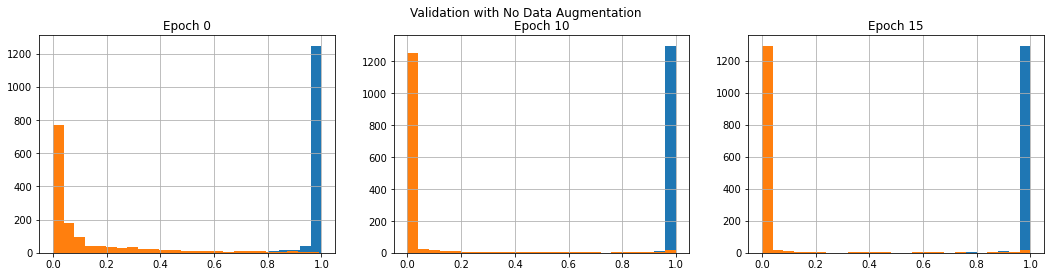

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

fig.suptitle('Validation with No Data Augmentation')

df0 = pd.read_csv(a0)

positive0 = df0[df0.target > .5]
negative0 = df0[df0.target < .5]

df1 = pd.read_csv(a1)

positive1 = df1[df1.target > .5]
negative1 = df1[df1.target < .5]

df2 = pd.read_csv(a2)

positive2 = df2[df2.target > .5]
negative2 = df2[df2.target < .5]

positive0.prob.hist(ax=ax1, bins=25)
negative0.prob.hist(ax=ax1, bins=25)
ax1.set_title('Epoch 0')

positive1.prob.hist(ax=ax2, bins=25)
negative1.prob.hist(ax=ax2, bins=25)
ax2.set_title('Epoch 10')

positive2.prob.hist(ax=ax3, bins=25)
negative2.prob.hist(ax=ax3, bins=25)
ax3.set_title('Epoch 15')
print()